<a href="https://colab.research.google.com/github/caganze/aganze_phys239/blob/master/homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3**


The final mass of an adiabatically contracted halo within radius $r_f$ is given by

$$M_f (r_f) = M_d(r_f)+ M_i(r_i) (1-m_d)  $$

For an initial profile truncated isothermal profile

$$\rho = \frac{\rho_0}{(1+r/r_{core})^2}  $$

After cooling, the surface mass density is given by 

$$\Sigma (r) = \Sigma_0 \exp{(-r/R_d)}$$

In $\Lambda $-CDM cosmology, the virial radius of a halo is given by 
$$R_{vir} \approx  163 h^{-1} kpc \biggl[ \frac{M_{vir}}{10^{12} h^{-1} M_\odot}\biggl]^{1/3} \biggl[ \frac{\Delta _{vir}}{200}\biggl]^{-1/3} \Omega _{m, 0} ^{-1/3} (1+z) ^{-1} $$ and 

$$ \Delta _{vir} = \frac{18 \pi ^2 +82 x -39 x^2}{x +1}$$ where $x =\Omega _m (z) -1$

For a $10^{12} M_\odot$ mass halo at $z=0$, $\Delta _{vir} =337 $, $r_{core} = 0.1 ~R_{vir} = 26$ kpc, and $R_{vir} = 260 $ kpc, this means that **$R_d =0.05 ~R_{vir} = 13 $ kpc** 


**This is twice the actual scale radius of the milky way**

<ol>
<li>  The initial mass profile $$ M_i (r_i) = \int _0 ^ {r_i} 4 \pi r^2 \rho _i (r) dr = \int _0 ^ {r_i} 4 \pi r^2   \frac{\rho_0 ~ dr}{(1+r/26 kpc)^2} $$

$$M_i (r_i) = 676 \rho_0 4 \pi \times 26  \biggl[ \frac{r_{26} (r_{26} +2 )}{r_{26} +1} -2 \ln (r_{26} +1) \biggl] = M_0 \biggl[ \frac{r_{26} (r_{26} +2 )}{r_{26} +1} -2 \ln (r_{26} +1) \biggl]$$ 

Where $M_0$ is the normalization in mass and $r_{26}$ is the radius in units of $26$ kpc

</li>
<li> To compute the contracted profile, I will follow these steps</li>
a) choose r $\in [0, 26 ] $ kpc

b) Compute $M_i(r)$

(c) Compute the disk mass at r as $$M_d (r) = \int _0 ^{r} \Sigma_0 4 \pi r \exp (-r /13 kpc) ~ dr= \Sigma_0 4 \pi 169~ (1- e^{-r_{13}}( r_{13} +1)) = M_{d0} (1- e^{-r_{13}}( r_{13} +1)) $$

c) Compute $M_f(r)$ using the first equation

d) Compute $V_{circ} = \sqrt{G M_f /r}$
</ol>



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import warnings


In [2]:
#plotting 
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#constants 
Grav= const.G.to((26*u.kpc)**3/(u.Msun*(u.second**2)))


#normalizations
Rvir=260*u.kpc
Vvir=velocity(10**12*u.Msun, Rvir)

#not sure what the right normalization is here 
MI0=10**12*u.Msun
MD0=10**12*u.Msun

In [145]:
Vvir.to(u.km/u.s)

<Quantity 128.61566584 km / s>

In [0]:
#functions 
def initial_mass(r):
  """
  computes the intial mass profile using radius in units of 26 kpc
  """
  return MI0*((r*(r+2)/(r+1))-2*np.log(r+1))

def disk_mass(r):
  """
  return a disk mass profile from the integrated surface mass density
  """
  return MD0*(1-np.exp(-2*r)*(2*r+1))

def final_mass(r, md):
  return disk_mass(r)+ initial_mass(r)*(1-md)

def velocity(m, r):
  return np.sqrt(Grav*m/r)

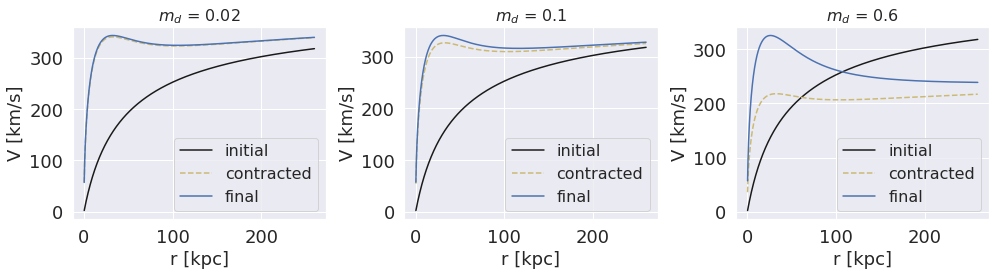

In [152]:
fig, ax=plt.subplots(ncols=3, figsize=(14, 4))


#compute the initial mass
rs= np.logspace(-3, 0, 1000)*Rvir

m_init= initial_mass(rs/(26*u.kpc))
v_init= velocity(m_init, rs)


for a, md in zip(ax, [0.02, 0.1, 0.6]):
  
  #compute the total velocity 
  mass_total= final_mass(rs/(26*u.kpc), md)
  vc_total= velocity(mass_total, rs)
  
  #compute the new halo profile
  mass_halo=    mass_total- md*disk_mass(rs/(26*u.kpc) )
  vc_contracted= velocity(mass_halo,rs)

  a.plot(rs, v_init.to(u.km/u.s), label='initial', c='k')
  a.plot(rs, vc_contracted.to(u.km/u.s), label='contracted',c='y', linestyle= '--')
  a.plot(rs, vc_total.to(u.km/u.s), label='final', c='b')

  a.legend(fontsize=16)
  a.set_ylabel('V [km/s]', fontsize=18)
  a.set_xlabel('r [kpc]', fontsize=18)
  a.set_title(r'$m_d$ = {}'.format(md), fontsize=16)
  a.minorticks_on()
plt.tight_layout()

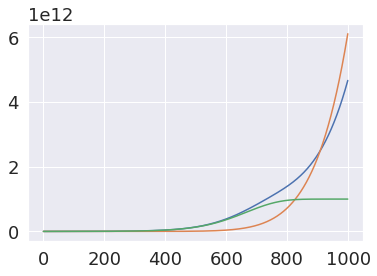

In [155]:
plt.plot(final_mass(rs/(26*u.kpc), 0.4))
plt.plot(initial_mass(rs/(26*u.kpc)))
plt.plot(disk_mass(rs/(26*u.kpc)))